/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/605862199.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['%change'] = train_data['Wind Output, % of Installed'].pct_change() * 100


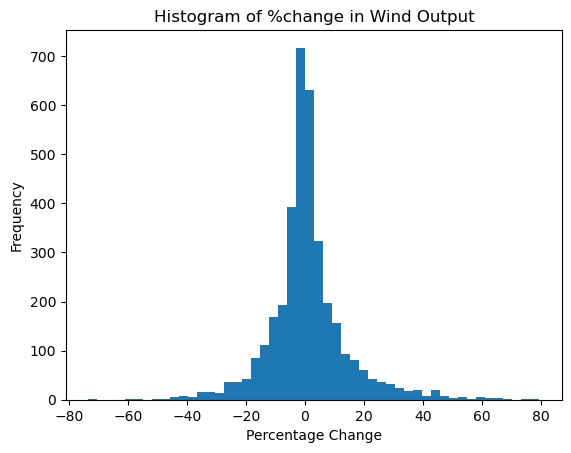

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and parse the datetime column
data = pd.read_csv('ercot_data.csv', parse_dates=['Time (Hour-Ending)'])

# Filter the data based on the train data split (January to May)
train_data = data[data['Time (Hour-Ending)'].dt.month.isin(range(1, 6))]

# Calculate the percentage change in wind output
train_data['%change'] = train_data['Wind Output, % of Installed'].pct_change() * 100

# Plot the histogram of the percentage change values
plt.hist(train_data['%change'].dropna(), bins=50)
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.title('Histogram of %change in Wind Output')
plt.show()


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/4117198487.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['%change'] = train_data['Wind Output, % of Installed'].pct_change() * 100


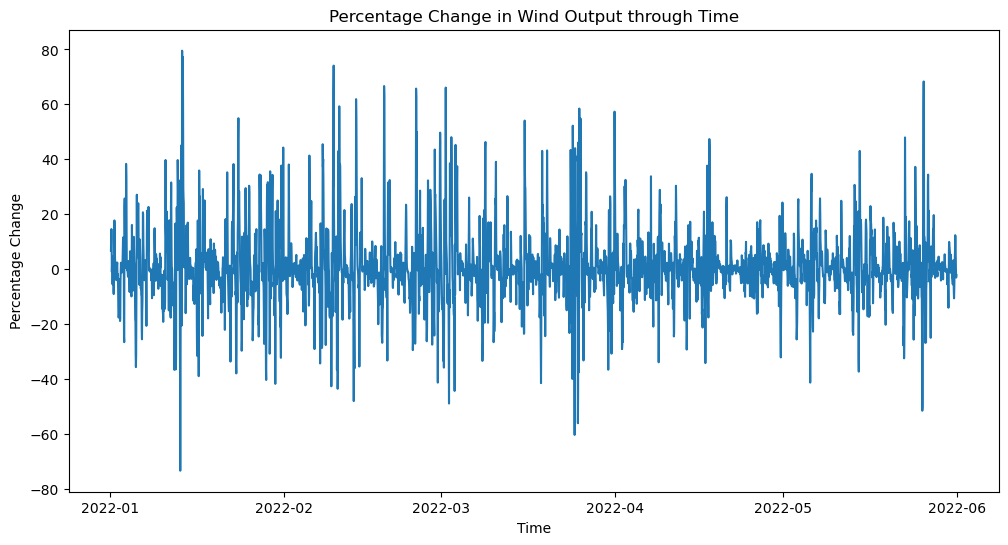

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and parse the datetime column
data = pd.read_csv('ercot_data.csv', parse_dates=['Time (Hour-Ending)'])
data['change'] = data['Wind Output, % of Installed'].pct_change() * 100

# Filter the data based on the train data split (January to May) of 2022
train_data = data[(data['Time (Hour-Ending)'].dt.month.isin(range(1, 6))) & (data['Time (Hour-Ending)'].dt.year == 2022)]

# Calculate the percentage change in wind output
train_data['%change'] = train_data['Wind Output, % of Installed'].pct_change() * 100
# Plot the percentage change values through time
plt.figure(figsize=(12, 6))
plt.plot(train_data['Time (Hour-Ending)'], train_data['%change'])
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Wind Output through Time')
plt.show()


In [6]:
#print percent of changes that are greater than 70%
print(train_data['%change'][train_data['%change'] > 70].count())

4


      Time (Hour-Ending)    Date  Wind Output, % of Installed     change  \
0    2022-01-01 01:00:00  Jan-01                        35.31        NaN   
1    2022-01-01 02:00:00  Jan-01                        37.70   6.768621   
2    2022-01-01 03:00:00  Jan-01                        42.04  11.511936   
3    2022-01-01 04:00:00  Jan-01                        48.18  14.605138   
4    2022-01-01 05:00:00  Jan-01                        53.66  11.374014   
...                  ...     ...                          ...        ...   
3617 2022-05-31 19:00:00  May-31                        62.19  11.912903   
3618 2022-05-31 20:00:00  May-31                        65.87   5.917350   
3619 2022-05-31 21:00:00  May-31                        66.30   0.652801   
3620 2022-05-31 22:00:00  May-31                        64.28  -3.046757   
3621 2022-05-31 23:00:00  May-31                        62.91  -2.131301   

        %change  
0           NaN  
1      6.768621  
2     11.511936  
3     14.605138

/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/67981771.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['%change'] = train_data['Wind Output, % of Installed'].pct_change() * 100


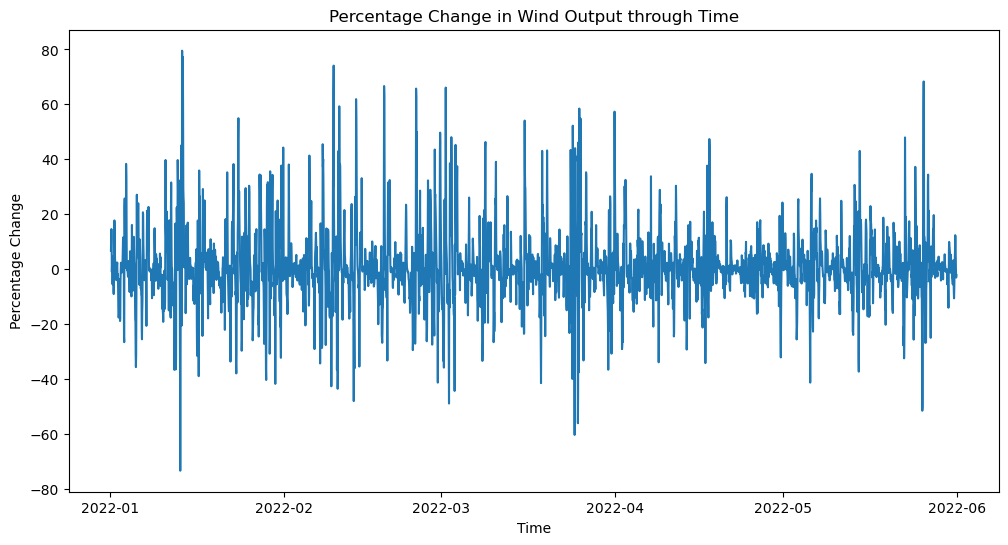

      Time (Hour-Ending)  Wind Output, % of Installed  F(t - 1)  F(t - 2)  \
5830 2022-09-01 00:00:00                         9.18      8.57      8.96   
5831 2022-09-01 01:00:00                        10.36      9.18      8.57   
5832 2022-09-01 02:00:00                         8.55     10.36      9.18   
5833 2022-09-01 03:00:00                         6.63      8.55     10.36   
5834 2022-09-01 04:00:00                         4.32      6.63      8.55   

      F(t - 3)  F(t - 4)  F(t - 5)  F(t - 6)  F(t - 7)  F(t - 8)  ...  \
5830      9.35     11.39     13.44     13.12     11.45     10.25  ...   
5831      8.96      9.35     11.39     13.44     13.12     11.45  ...   
5832      8.57      8.96      9.35     11.39     13.44     13.12  ...   
5833      9.18      8.57      8.96      9.35     11.39     13.44  ...   
5834     10.36      9.18      8.57      8.96      9.35     11.39  ...   

      F(t - 15)  F(t - 16)  F(t - 17)  F(t - 18)  F(t - 19)  F(t - 20)  \
5830       3.58       3.

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_squared_error


# Load the data and parse the datetime column
data = pd.read_csv('ercot_data.csv', parse_dates=['Time (Hour-Ending)'])
data['change'] = data['Wind Output, % of Installed'].pct_change() * 100

# Filter the data based on the train data split (January to May) of 2022
train_data 
train_data = data[(data['Time (Hour-Ending)'].dt.month.isin(range(1, 6))) & (data['Time (Hour-Ending)'].dt.year == 2022)]

# Calculate the percentage change in wind output
train_data['%change'] = train_data['Wind Output, % of Installed'].pct_change() * 100
print(train_data)
print(train_data['%change'])
print(train_data['Time (Hour-Ending)'])
# Plot the percentage change values through time
plt.figure(figsize=(12, 6))
plt.plot(train_data['Time (Hour-Ending)'], train_data['%change'])
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Wind Output through Time')
plt.show()

# Create a new DataFrame with lagged features
lagged_data = data[['Time (Hour-Ending)', 'Wind Output, % of Installed']].copy()
for i in range(1, 25):
    lagged_data[f'F(t - {i})'] = lagged_data['Wind Output, % of Installed'].shift(i)
lagged_data.dropna(inplace=True)

# Split the dataset into training, validation, and testing sets
train_data = lagged_data[(lagged_data['Time (Hour-Ending)'].dt.month.isin(range(1, 6))) & (lagged_data['Time (Hour-Ending)'].dt.year == 2022)]
test_data = lagged_data[lagged_data['Time (Hour-Ending)'].dt.month.isin(range(9, 13))]
print(test_data.head())

# Train a quantile regression model with α = 0.50
X_train = train_data.iloc[:, 2:].values
y_train = train_data['Wind Output, % of Installed'].values
qr = QuantileRegressor(quantile=0.50,alpha=.5, solver='highs').fit(X_train, y_train)

# Make predictions on the test set
X_test = test_data.iloc[:, 2:].values
y_test = test_data['Wind Output, % of Installed'].values
y_pred = qr.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

# Compute the proportion of predictions that lie below the actual value
below_actual = np.sum(y_pred < y_test) / len(y_test)
print(f'Proportion of predictions below actual value: {below_actual}')



[[63.06 63.68 62.56 ... 42.04 37.7  35.31]
 [60.54 63.06 63.68 ... 48.18 42.04 37.7 ]
 [58.37 60.54 63.06 ... 53.66 48.18 42.04]
 ...
 [65.87 62.19 55.57 ... 70.11 66.59 66.82]
 [66.3  65.87 62.19 ... 72.66 70.11 66.59]
 [64.28 66.3  65.87 ... 73.09 72.66 70.11]]
Mean squared error: 6.559767019123185
Proportion of predictions below actual value: 0.41140320928644586


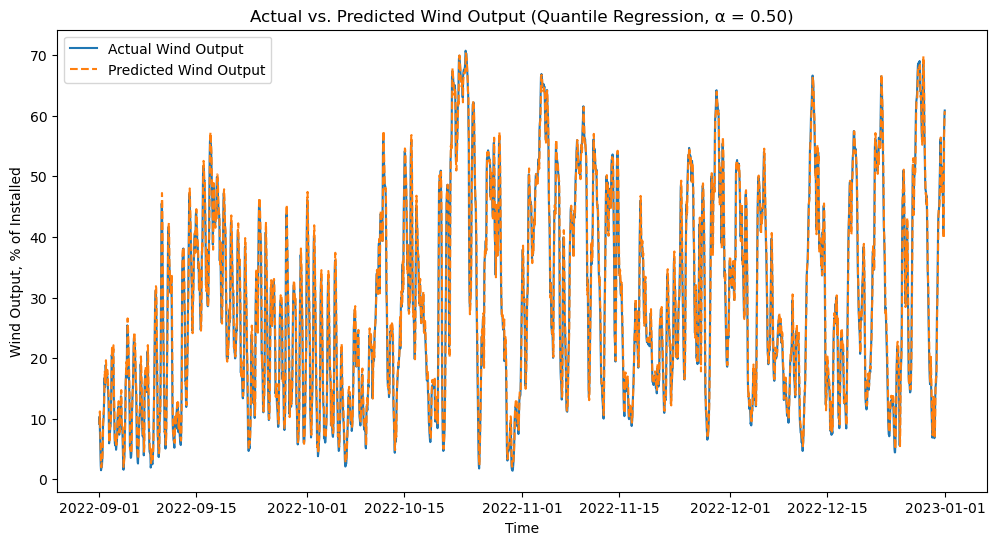

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_squared_error


# Load the data and parse the datetime column
data = pd.read_csv('ercot_data.csv', parse_dates=['Time (Hour-Ending)'])

# Create a new DataFrame with lagged features
lagged_data = data[['Time (Hour-Ending)', 'Wind Output, % of Installed']].copy()
for i in range(1, 25):
    lagged_data[f'F(t - {i})'] = lagged_data['Wind Output, % of Installed'].shift(i)
lagged_data.dropna(inplace=True)

# Split the dataset into training, validation, and testing sets
train_data = lagged_data[(lagged_data['Time (Hour-Ending)'].dt.month.isin(range(1, 6))) & (lagged_data['Time (Hour-Ending)'].dt.year == 2022)]
test_data = lagged_data[lagged_data['Time (Hour-Ending)'].dt.month.isin(range(9, 13))]




# Train a quantile regression model with α = 0.50
X_train = train_data.iloc[:, 2:].values
y_train = train_data['Wind Output, % of Installed'].values
qr = QuantileRegressor(quantile=0.50,alpha=.5, solver='highs').fit(X_train, y_train)
print(X_train)

# Make predictions on the test set
X_test = test_data.iloc[:, 2:].values
y_test = test_data['Wind Output, % of Installed'].values
y_pred = qr.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

# Compute the proportion of predictions that lie below the actual value
below_actual = np.sum(y_pred < y_test) / len(y_test)
print(f'Proportion of predictions below actual value: {below_actual}')

# Plot the actual and predicted wind output
plt.figure(figsize=(12, 6))
plt.plot(test_data['Time (Hour-Ending)'], y_test, label='Actual Wind Output')
plt.plot(test_data['Time (Hour-Ending)'], y_pred, label='Predicted Wind Output', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Wind Output, % of Installed')
plt.title('Actual vs. Predicted Wind Output (Quantile Regression, α = 0.50)')
plt.legend()
plt.show()


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/2223790433.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Wind Output Change"] = train_df["Wind Output"].pct_change() * 100


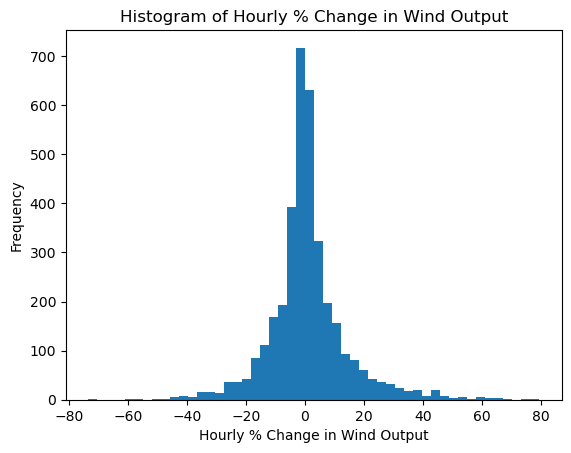

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the data
df = pd.read_csv("ercot_data.csv")
df["Timestamp"] = pd.to_datetime(df["Time (Hour-Ending)"])
df = df.drop(columns=["Time (Hour-Ending)", "Date"])
df.columns = ["Wind Output", "Timestamp"]

# Sort the data by the 'Timestamp' column
df = df.sort_values(by="Timestamp")

# Create train, validation, and test splits
train_df = df[df["Timestamp"] < "2022-06-01"]
validation_df = df[(df["Timestamp"] >= "2022-06-01") & (df["Timestamp"] < "2022-09-01")]
test_df = df[df["Timestamp"] >= "2022-09-01"]

# Compute the %change in wind output
train_df["Wind Output Change"] = train_df["Wind Output"].pct_change() * 100

# Plot the histogram
plt.hist(train_df["Wind Output Change"].dropna(), bins=50)
plt.xlabel("Hourly % Change in Wind Output")
plt.ylabel("Frequency")
plt.title("Histogram of Hourly % Change in Wind Output")
plt.show()

# # Fit an autoregressive quantile regression model
# train_df["Lag1"] = train_df["Wind Output Change"].shift(1)
# train_df = train_df.dropna()

# # Example for 0.25 quantile
# q = 0.25
# quantile_regression = smf.quantreg(f"Q({q}) ~ Lag1", train_df).fit(q=q)
# print(quantile_regression.summary())


In [10]:
train_df["Lag1"] = train_df["Wind Output Change"].shift(1)
train_df = train_df.dropna()
# rename Wind Output Change to change
train_df.rename(columns={'Wind Output Change':'change'}, inplace=True)
# rename wind output to output
train_df.rename(columns={'Wind Output':'output'}, inplace=True)


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/908692709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Lag1"] = train_df["Wind Output Change"].shift(1)


In [11]:
df.head(
)

,Wind Output,Timestamp
0,35.31,2022-01-01 01:00:00
1,37.70,2022-01-01 02:00:00
2,42.04,2022-01-01 03:00:00
3,48.18,2022-01-01 04:00:00
4,53.66,2022-01-01 05:00:00


In [12]:
def create_lagged_features(df, max_lag):
    for lag in range(1, max_lag +  1):
        df[f"Lag{lag}"] = df["Wind Output"].shift(lag)
    return df.dropna()

In [13]:
test_df = create_lagged_features(test_df, 24)
test_df = create_lagged_features(test_df, 24)


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/2878350876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Lag{lag}"] = df["Wind Output"].shift(lag)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/2878350876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Lag{lag}"] = df["Wind Output"].shift(lag)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/2878350876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [14]:
train_df["Lag1"] = train_df["output"].shift(1)
train_df = train_df.dropna()

# Example for 0.25 quantile
q = 0.25
quantile_regression = smf.quantreg("output ~ Lag1", train_df).fit(q=q)
print(quantile_regression.summary())

                         QuantReg Regression Results                          
Dep. Variable:                 output   Pseudo R-squared:               0.8440
Model:                       QuantReg   Bandwidth:                      0.7213
Method:                 Least Squares   Sparsity:                        9.469
Date:                Fri, 08 Sep 2023   No. Observations:                 3619
Time:                        17:23:47   Df Residuals:                     3617
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7585      0.153    -11.526      0.000      -2.058      -1.459
Lag1           0.9998      0.003    297.311      0.000       0.993       1.006


In [15]:
def create_lagged_features(df, max_lag):
    for lag in range(1, max_lag + 1):
        df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
    return df.dropna()

In [16]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv("ercot_data.csv")
df["Timestamp"] = pd.to_datetime(df["Time (Hour-Ending)"])
df = df.drop(columns=["Time (Hour-Ending)", "Date"])
df.columns = ["WindOutput", "Timestamp"]

# Sort the data by the 'Timestamp' column
df = df.sort_values(by="Timestamp")

# Create train, validation, and test splits
train_df = df[df["Timestamp"] < "2022-06-01"]
validation_df = df[(df["Timestamp"] >= "2022-06-01") & (df["Timestamp"] < "2022-09-01")]
test_df = df[df["Timestamp"] >= "2022-09-01"]

# Create lagged features
def create_lagged_features(df, max_lag):
    for lag in range(1, max_lag + 1):
        df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
    return df.dropna()

# Fit the autoregressive quantile regression model
train_df = create_lagged_features(train_df, 24)
train_df["Wind Output Change"] = train_df["WindOutput"].pct_change() * 100

test_df = create_lagged_features(test_df, 24)

# Construct the formula for the quantile regression
formula = "WindOutput ~ " + " + ".join([f"Lag{i}" for i in range(1, 25)])

# Fit the quantile regression model with α = 0.50
q = 0.50
quantile_regression = smf.quantreg(formula, train_df).fit(q=q)

# Predict the test set values
test_df["Predicted"] = quantile_regression.predict(test_df)

# Compute the mean squared error
mse = mean_squared_error(test_df["WindOutput"], test_df["Predicted"])
print(f"Mean Squared Error: {mse}")

# Compute the proportion of predictions that lie below the actual value
below_actual = (test_df["Predicted"] < test_df["WindOutput"]).sum()
total_predictions = len(test_df)
proportion_below_actual = below_actual / total_predictions
print(f"Proportion of Predictions Below Actual Value: {proportion_below_actual}")


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/3352377820.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/3352377820.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/3352377820.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Mean Squared Error: 3.945575751822981
Proportion of Predictions Below Actual Value: 0.4333907056798623


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv("ercot_data.csv")
df["Timestamp"] = pd.to_datetime(df["Time (Hour-Ending)"])
df = df.drop(columns=["Time (Hour-Ending)", "Date"])
df.columns = ["WindOutput", "Timestamp"]

# Sort the data by the 'Timestamp' column
df = df.sort_values(by="Timestamp")

# Create train, validation, and test splits
train_df = df[df["Timestamp"] < "2022-06-01"]
validation_df = df[(df["Timestamp"] >= "2022-06-01") & (df["Timestamp"] < "2022-09-01")]
test_df = df[df["Timestamp"] >= "2022-09-01"]

# Create lagged features
def create_lagged_features(df, max_lag):
    for lag in range(1, max_lag + 1):
        df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
    return df.dropna()

# Fit the autoregressive quantile regression model
train_df = create_lagged_features(train_df, 24)
test_df = create_lagged_features(test_df, 24)

# Construct the formula for the quantile regression
formula = "WindOutput ~ " + " + ".join([f"Lag{i}" for i in range(1, 25)])

# Fit the quantile regression model with α = 0.50
q = 0.50
quantile_regression = smf.quantreg(formula, train_df).fit(q=q)

# Predict the test set values
test_df["Predicted"] = quantile_regression.predict(test_df)

# Compute the mean squared error
mse = mean_squared_error(test_df["WindOutput"], test_df["Predicted"])
print(f"Mean Squared Error: {mse}")

# Compute the proportion of predictions that lie below the actual value
below_actual = (test_df["Predicted"] < test_df["WindOutput"]).sum()
total_predictions = len(test_df)
proportion_below_actual = below_actual / total_predictions
print(f"Proportion of Predictions Below Actual Value: {proportion_below_actual}")


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/1097200741.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/1097200741.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/1097200741.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Mean Squared Error: 3.945575751822981
Proportion of Predictions Below Actual Value: 0.4333907056798623


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/1516945551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted"] = quantile_regression.predict(test_df)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/1516945551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted"] = quantile_regression.predict(test_df)


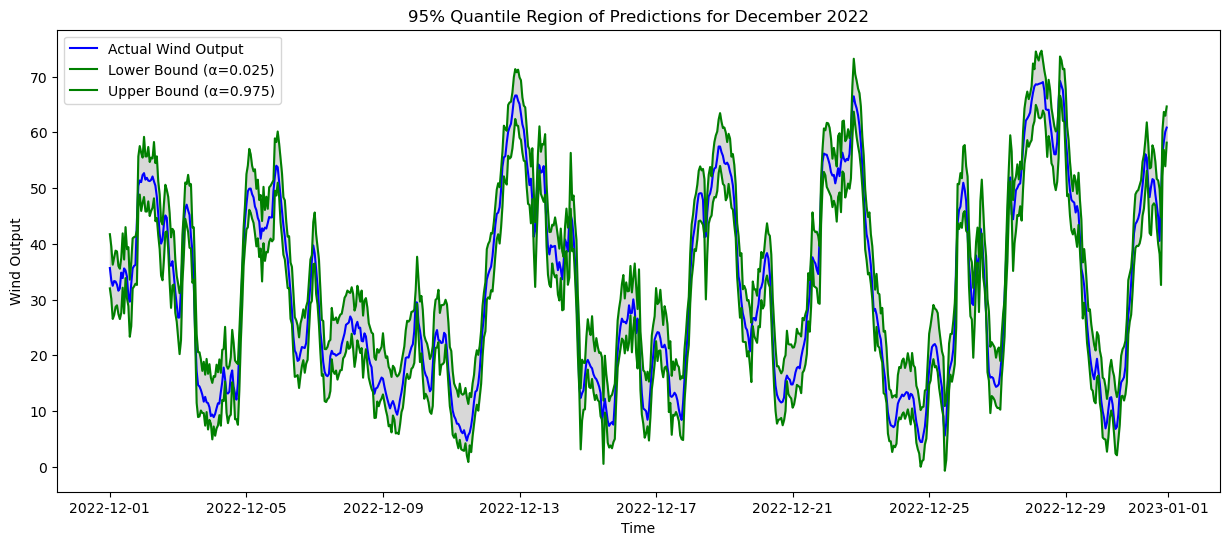

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Fit the quantile regression model for a given alpha
def fit_quantile_regression(alpha, train_df):
    quantile_regression = smf.quantreg(formula, train_df).fit(q=alpha)
    return quantile_regression

# Predict the test set values for a given quantile regression model
def predict_quantile_regression(test_df, quantile_regression):
    test_df["Predicted"] = quantile_regression.predict(test_df)
    return test_df["Predicted"]

# Fit the quantile regression models for alpha = 0.025 and alpha = 0.975
alpha_lower = 0.025
alpha_upper = 0.975

quantile_regression_lower = fit_quantile_regression(alpha_lower, train_df)
quantile_regression_upper = fit_quantile_regression(alpha_upper, train_df)

# Predict the lower and upper bounds for December 2022
december_2022 = test_df[(test_df["Timestamp"] >= "2022-12-01") & (test_df["Timestamp"] < "2023-01-01")]
lower_bound = predict_quantile_regression(december_2022, quantile_regression_lower)
upper_bound = predict_quantile_regression(december_2022, quantile_regression_upper)

# Plot the 95% quantile region for December 2022
plt.figure(figsize=(15, 6))
plt.plot(december_2022["Timestamp"], december_2022["WindOutput"], label="Actual Wind Output", color="blue")
plt.plot(december_2022["Timestamp"], lower_bound, label=f"Lower Bound (α={alpha_lower})", color="green")
plt.plot(december_2022["Timestamp"], upper_bound, label=f"Upper Bound (α={alpha_upper})", color="green")
plt.fill_between(december_2022["Timestamp"], lower_bound, upper_bound, color="gray", alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Wind Output")
plt.title("95% Quantile Region of Predictions for December 2022")
plt.legend()
plt.show()


In [19]:
K=24; weights = np.ones((K,)); # Take a fixed window of K
wtildes = weights/(weights.sum() + 1)
alpha = 0.05
n= 24

In [20]:
# Get scores
# december_2022['WindOutput'], lower_bound, upper_bound
validation_df = create_lagged_features(validation_df, 24)
label = december_2022['WindOutput']
trainingLabel = train_df['WindOutput']
calibration = validation_df['WindOutput']
print(label.shape, trainingLabel.shape, calibration.shape)




(744,) (3598,) (2184,)


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/1097200741.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/1097200741.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Lag{lag}"] = df["WindOutput"].shift(lag)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_53039/1097200741.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [21]:
# fit calibration to upper and lower
upper_bound_cal = predict_quantile_regression(validation_df, quantile_regression_upper)
lower_bound_cal = predict_quantile_regression(validation_df, quantile_regression_lower)
print(upper_bound_cal)

3646    50.739370
3647    49.809526
3648    42.463514
3649    39.586302
3650    44.462686
          ...    
5825    20.885829
5826    18.578698
5827    16.440813
5828    14.974855
5829    15.392203
Name: Predicted, Length: 2184, dtype: float64


In [22]:
model_lower = lower_bound
model_upper = upper_bound
cal_scores = np.maximum(calibration-upper_bound_cal, lower_bound_cal-calibration)


In [23]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from tqdm import tqdm
from scipy.optimize import brentq
!pip install -U --no-cache-dir gdown --pre

In [24]:
# Problem setup
alpha = 0.05 # 1-alpha is the desired coverage
K=24; weights = np.ones((K,)); # Take a fixed window of K
wtildes = weights/(weights.sum() + 1)
print(wtildes)

[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]


In [25]:
august_2022["AdjustedQuantile"]

NameError: name 'august_2022' is not defined

In [ ]:
lower_bound = predict_quantile_regression(december_2022, quantile_regression_lower)
upper_bound = predict_quantile_regression(december_2022, quantile_regression_upper)


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_88331/1516945551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted"] = quantile_regression.predict(test_df)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_88331/1516945551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted"] = quantile_regression.predict(test_df)


In [ ]:
# Prepare the dataset with non-conformity scores
december_2022["NonConformity"] = np.maximum(december_2022["WindOutput"] - upper_bound, lower_bound - december_2022["WindOutput"])

# Initialize the parameters
K = 24
alpha = 0.05

# Calculate the adjusted quantiles
december_2022["AdjustedQuantile"] = np.nan
for i in range(K, len(december_2022)):
    window_scores = december_2022["NonConformity"][i-K:i].values
    qt = weighted_conformal_quantile(window_scores, K, alpha)
    december_2022["AdjustedQuantile"].iloc[i] = qt


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_88331/2945359838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_2022["NonConformity"] = np.maximum(december_2022["WindOutput"] - upper_bound, lower_bound - december_2022["WindOutput"])
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_88331/2945359838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_2022["AdjustedQuantile"] = np.nan
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_88331/2945359838.py:13: 

In [ ]:
print(december_2022["AdjustedQuantile"])

8015         NaN
8016         NaN
8017         NaN
8018         NaN
8019         NaN
          ...   
8754   -1.934934
8755   -1.370262
8756   -1.370262
8757   -1.370262
8758   -1.370262
Name: AdjustedQuantile, Length: 744, dtype: float64


In [ ]:
print(december_2022["AdjustedQuantile"])
# Form prediction sets using adjusted quantiles
december_2022["ConformalizedLower"] = lower_bound - december_2022["AdjustedQuantile"]
december_2022["ConformalizedUpper"] = upper_bound + december_2022["AdjustedQuantile"]

# Note: You may get a warning regarding setting values on a slice from a DataFrame, which can be safely ignored.


8015         NaN
8016         NaN
8017         NaN
8018         NaN
8019         NaN
          ...   
8754   -1.934934
8755   -1.370262
8756   -1.370262
8757   -1.370262
8758   -1.370262
Name: AdjustedQuantile, Length: 744, dtype: float64


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_88331/4074862721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_2022["ConformalizedLower"] = lower_bound - december_2022["AdjustedQuantile"]
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_88331/4074862721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_2022["ConformalizedUpper"] = upper_bound + december_2022["AdjustedQuantile"]


KeyError: 'ConformalizedUpper'

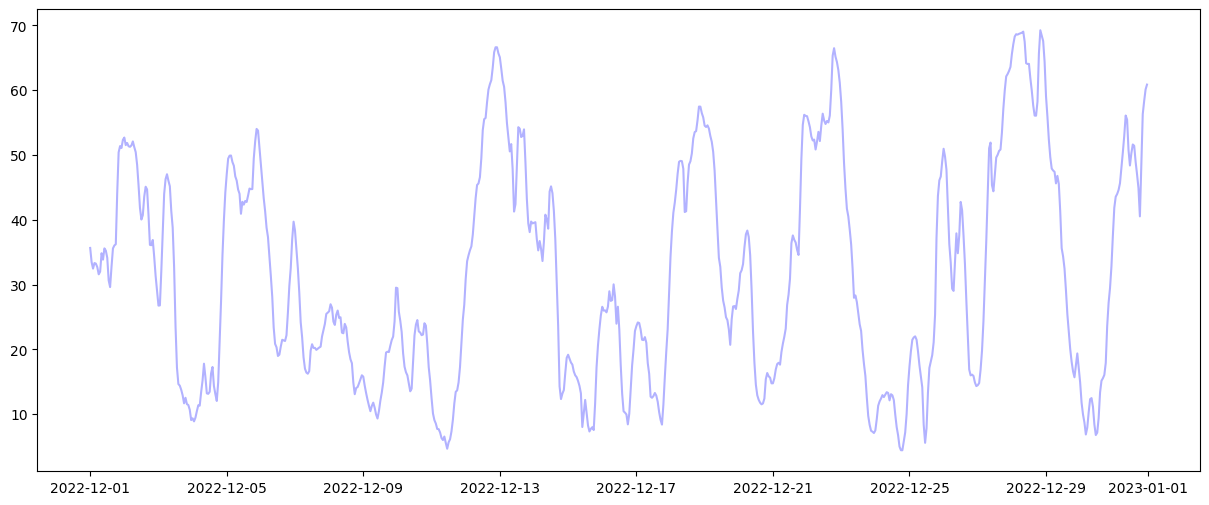

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(december_2022["Timestamp"], december_2022["WindOutput"], label="Actual Wind Output", color="blue" , alpha=0.3)
plt.plot(december_2022["Timestamp"], december_2022["ConformalizedUpper"], label="Conformalized Upper Bound (α=0.05)", color="gray", alpha=0.3)
plt.plot(december_2022["Timestamp"], december_2022["ConformalizedLower"], label="Conformalized Lower Bound (α=0.05)", color="gray", alpha=0.3)
plt.fill_between(december_2022["Timestamp"], december_2022["ConformalizedLower"], december_2022["ConformalizedUpper"], color="gray", alpha=0.3)


# plt.plot(december_2022["Timestamp"], upper_bound, label="NWConformalized Upper Bound (α=0.05)", color="green", alpha=0.3)
# plt.plot(december_2022["Timestamp"], lower_bound, label="NWConformalized Lower Bound (α=0.05)", color="green", alpha=0.3)
# plt.fill_between(december_2022["Timestamp"], lower_bound, upper_bound, color="green", alpha=0.3)

plt.xlabel("Time")
plt.ylabel("Wind Output")
plt.title("Conformalized Prediction Bounds for December 2022")
plt.legend()
plt.show()


In [ ]:
# # Use the uncertainty scalars method to get conformal scores
# scores = cal_scores
# # Get the weighted score quantile at each time step
# def get_weighted_quantile(scores,T):
#     score_window = scores[T-K:T]
#     # print(score_window)
#     def critical_point_quantile(q): 
#         # print("q",q,(score_window <= q).sum())
#         a = (wtildes * (score_window <= q)).sum() - (1 - alpha)
        
#         return a
    
#     return brentq(critical_point_quantile, 2.5, 97.5)
# qhats = np.array( [get_weighted_quantile(scores, t) for t in range(K+1, scores.shape[0])] )
# # Deploy (output=lower and upper adjusted quantiles)
# prediction_sets = [pred_mean[K+1:] - pred_uncertainty[K+1:]*qhats, pred_mean[K+1:] + pred_uncertainty[K+1:]*qhats]

In [ ]:
model_lower = lower_bound
model_upper = upper_bound
cal_scores = np.maximum(calibration-upper_bound_cal, lower_bound_cal-calibration)
print(cal_scores)

# Get the score quantile
qhat = np.quantile(cal_scores, np.ceil((n+1)*(1-alpha))/n, interpolation='higher')
# Deploy (output=lower and upper adjusted quantiles)
# print(qhat)
prediction_sets = [lower_bound - qhat, upper_bound + qhat]
# print(prediction_sets)

3646   -2.829357
3647    3.169361
3648   -4.743519
3649   -0.656306
3650    4.777366
          ...   
5825   -2.970024
5826   -1.556152
5827   -3.451901
5828   -4.502523
5829   -3.628331
Length: 2184, dtype: float64


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_51003/3871609162.py:7: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  qhat = np.quantile(cal_scores, np.ceil((n+1)*(1-alpha))/n, interpolation='higher')


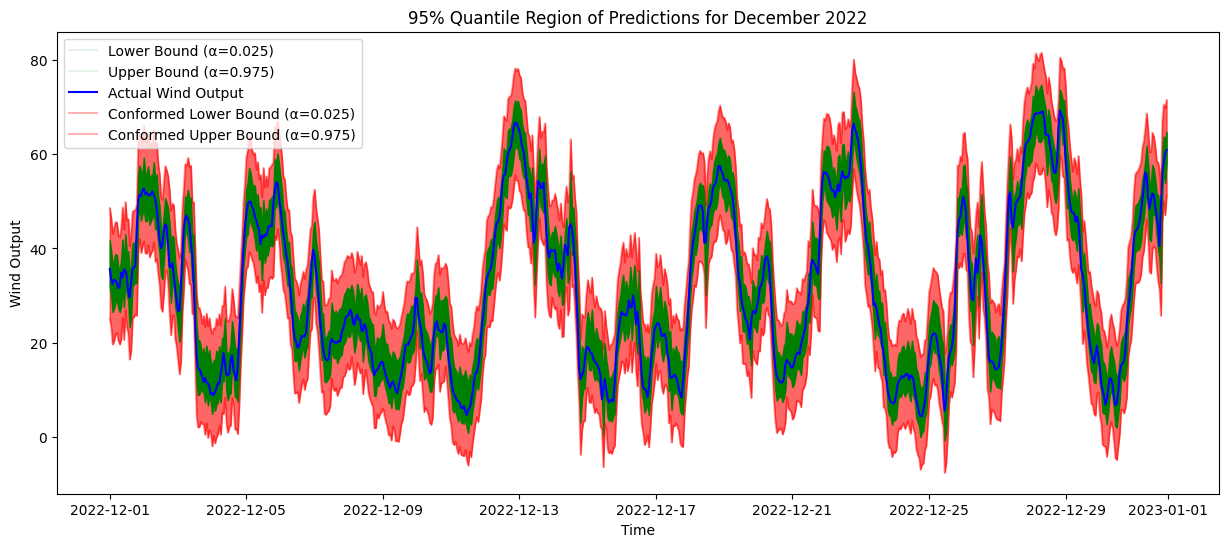

In [ ]:
# Plot the 95% quantile region for December 2022
plt.figure(figsize=(15, 6))
plt.plot(december_2022["Timestamp"], lower_bound, label=f"Lower Bound (α={alpha_lower})", color="green", alpha=0.1)
plt.plot(december_2022["Timestamp"], upper_bound, label=f"Upper Bound (α={alpha_upper})", color="green", alpha=0.1
)
plt.plot(december_2022["Timestamp"], december_2022["WindOutput"], label="Actual Wind Output", color="blue")
plt.plot(december_2022["Timestamp"], prediction_sets[0], label=f"Conformed Lower Bound (α={alpha_lower})", color="red",alpha=0.3)
plt.plot(december_2022["Timestamp"], prediction_sets[1], label=f"Conformed Upper Bound (α={alpha_upper})", color="red",alpha=0.3)
plt.fill_between(december_2022["Timestamp"], prediction_sets[0], prediction_sets[1], color="red", alpha=0.6)
plt.fill_between(december_2022["Timestamp"], lower_bound, upper_bound, color="green", alpha=1)
plt.xlabel("Time")
plt.ylabel("Wind Output")
plt.title("95% Quantile Region of Predictions for December 2022")


plt.legend()

plt.show()

/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_51003/1516945551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted"] = quantile_regression.predict(test_df)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_51003/1516945551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted"] = quantile_regression.predict(test_df)
/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_51003/3690115386.py:9: SettingWithCopyWarning: 
A value is trying to be set

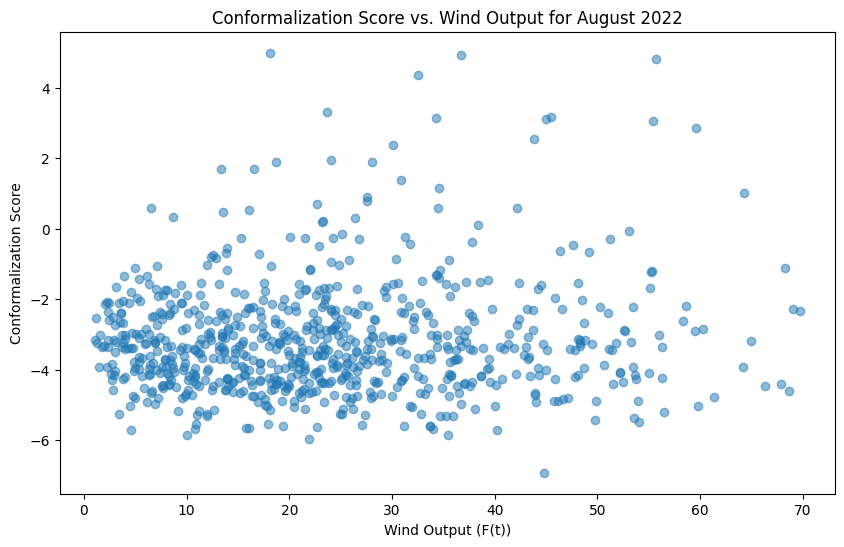

In [ ]:
# Filter the data for August 2022
august_2022 = validation_df[(validation_df["Timestamp"] >= "2022-08-01") & (validation_df["Timestamp"] < "2022-09-01")]

# Predict the lower and upper bounds for August 2022
lower_bound_august = predict_quantile_regression(august_2022, quantile_regression_lower)
upper_bound_august = predict_quantile_regression(august_2022, quantile_regression_upper)

# Calculate the non-conformity scores for August 2022
august_2022['NonConformity'] = np.maximum(august_2022['WindOutput'] - upper_bound_august, lower_bound_august - august_2022['WindOutput'])

# Plot the conformalization score as a function of F(t) for August 2022
plt.figure(figsize=(10, 6))
plt.scatter(august_2022['WindOutput'], august_2022['NonConformity'], alpha=0.5)
plt.xlabel('Wind Output (F(t))')
plt.ylabel('Conformalization Score')
plt.title('Conformalization Score vs. Wind Output for August 2022')
plt.show()


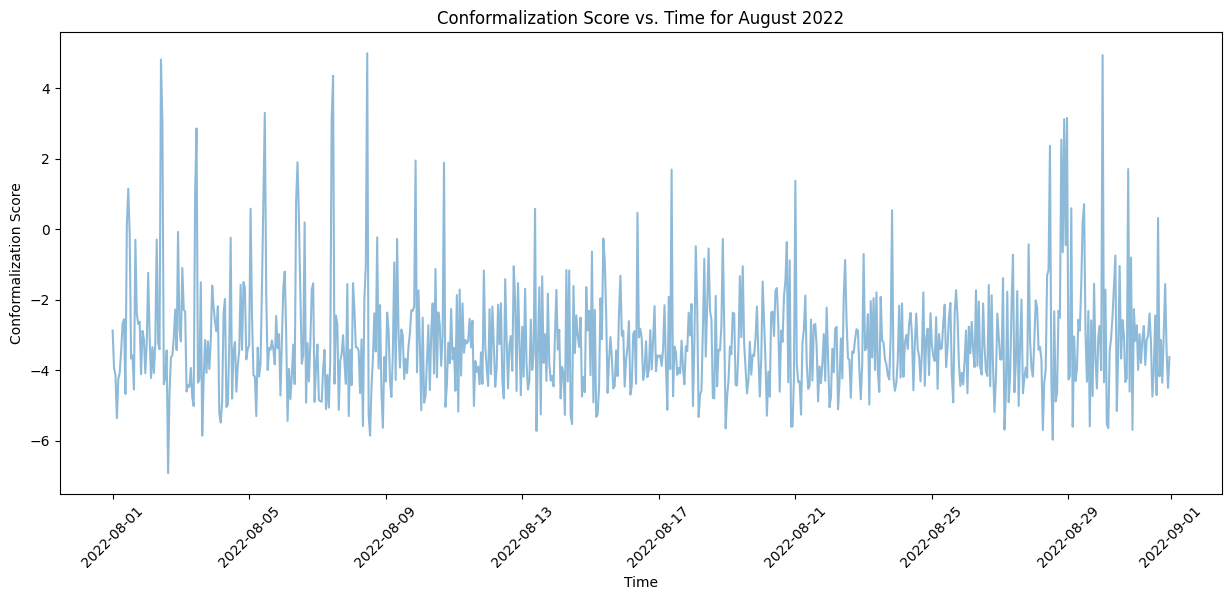

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(august_2022['Timestamp'], august_2022['NonConformity'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Conformalization Score')
plt.title('Conformalization Score vs. Time for August 2022')
plt.xticks(rotation=45)
plt.show()


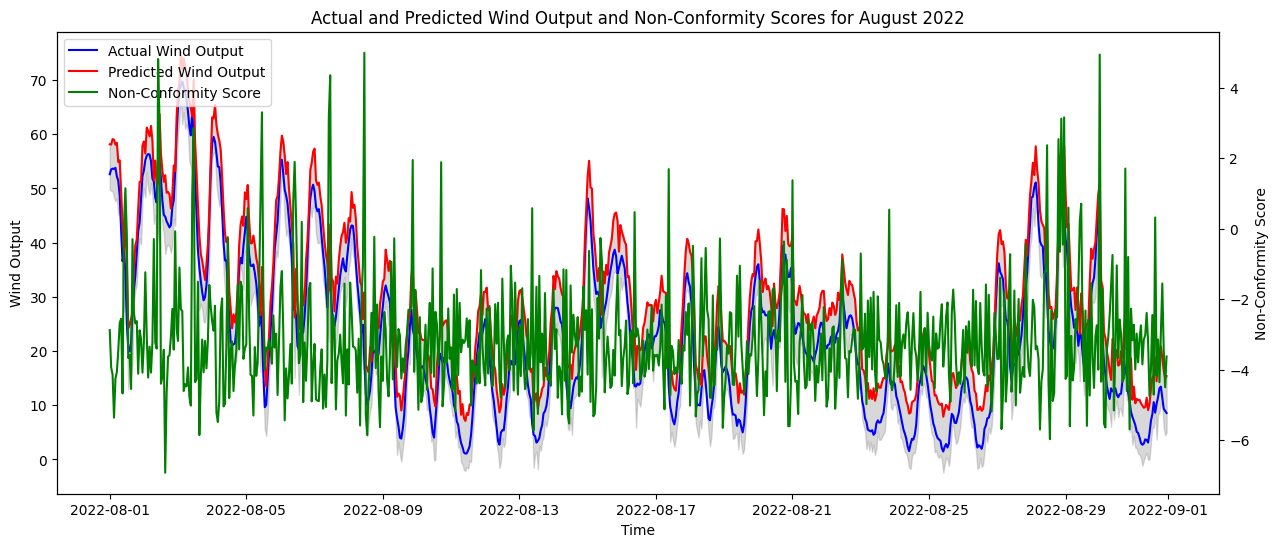

In [ ]:
# Create a second y-axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

# Plot the actual and predicted wind output
ax1.plot(august_2022["Timestamp"], august_2022["WindOutput"], label="Actual Wind Output", color="blue")
ax1.plot(august_2022["Timestamp"], august_2022["Predicted"], label="Predicted Wind Output", color="red")
ax1.fill_between(august_2022["Timestamp"], lower_bound_august, upper_bound_august, color="gray", alpha=0.3)
ax1.set_xlabel("Time")
ax1.set_ylabel("Wind Output")

# Plot the non-conformity scores
ax2.plot(august_2022["Timestamp"], august_2022["NonConformity"], label="Non-Conformity Score", color="green")
ax2.set_ylabel("Non-Conformity Score")

# Combine the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

# Set the legend and title
ax1.legend(lines, labels, loc='upper left')
plt.title("Actual and Predicted Wind Output and Non-Conformity Scores for August 2022")
plt.xticks(rotation=45)
plt.show()


/var/folders/5y/d1z3nqxn7rn0144_s5r1qv_c0000gn/T/ipykernel_51003/2318298417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  august_2022["NormalizedNonConformity"] = scaler.fit_transform(august_2022["NonConformity"].values.reshape(-1, 1))


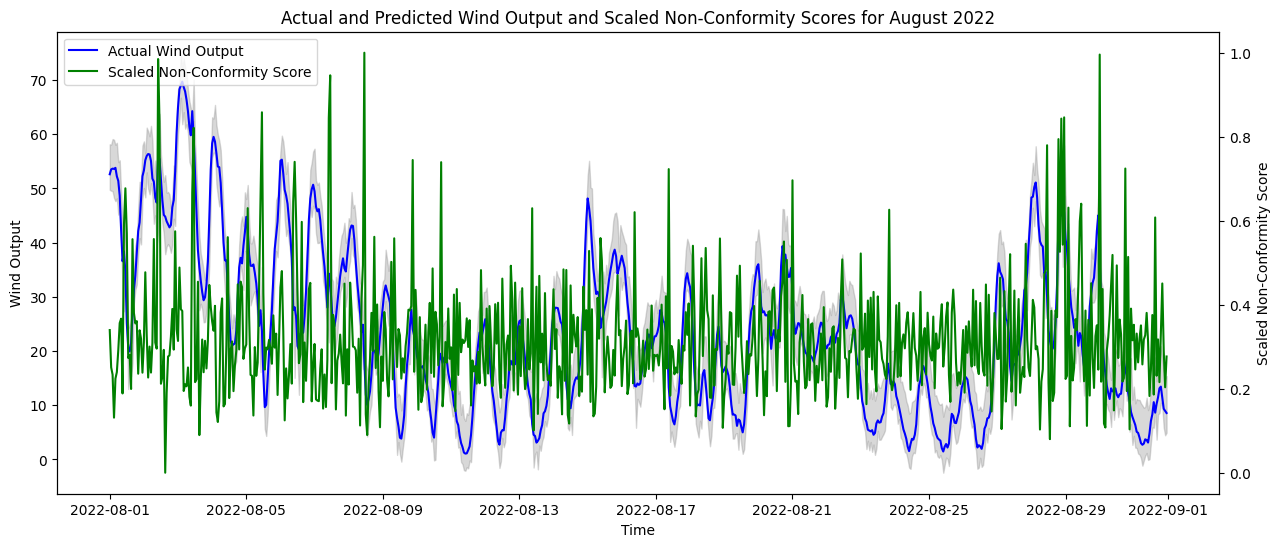

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the non-conformity scores
scaler = MinMaxScaler()
august_2022["NormalizedNonConformity"] = scaler.fit_transform(august_2022["NonConformity"].values.reshape(-1, 1))

# Create a second y-axis
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

# Plot the actual and predicted wind output
ax1.plot(august_2022["Timestamp"], august_2022["WindOutput"], label="Actual Wind Output", color="blue")
# ax1.plot(august_2022["Timestamp"], august_2022["Predicted"], label="Predicted Wind Output", color="red")
ax1.fill_between(august_2022["Timestamp"], lower_bound_august, upper_bound_august, color="gray", alpha=0.3)
ax1.set_xlabel("Time")
ax1.set_ylabel("Wind Output")

# Plot the scaled non-conformity scores
ax2.plot(august_2022["Timestamp"], august_2022["NormalizedNonConformity"], label="Scaled Non-Conformity Score", color="green")
ax2.set_ylabel("Scaled Non-Conformity Score")

# Combine the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

# Set the legend and title
ax1.legend(lines, labels, loc='upper left')
plt.title("Actual and Predicted Wind Output and Scaled Non-Conformity Scores for August 2022")
plt.xticks(rotation=45)
plt.show()


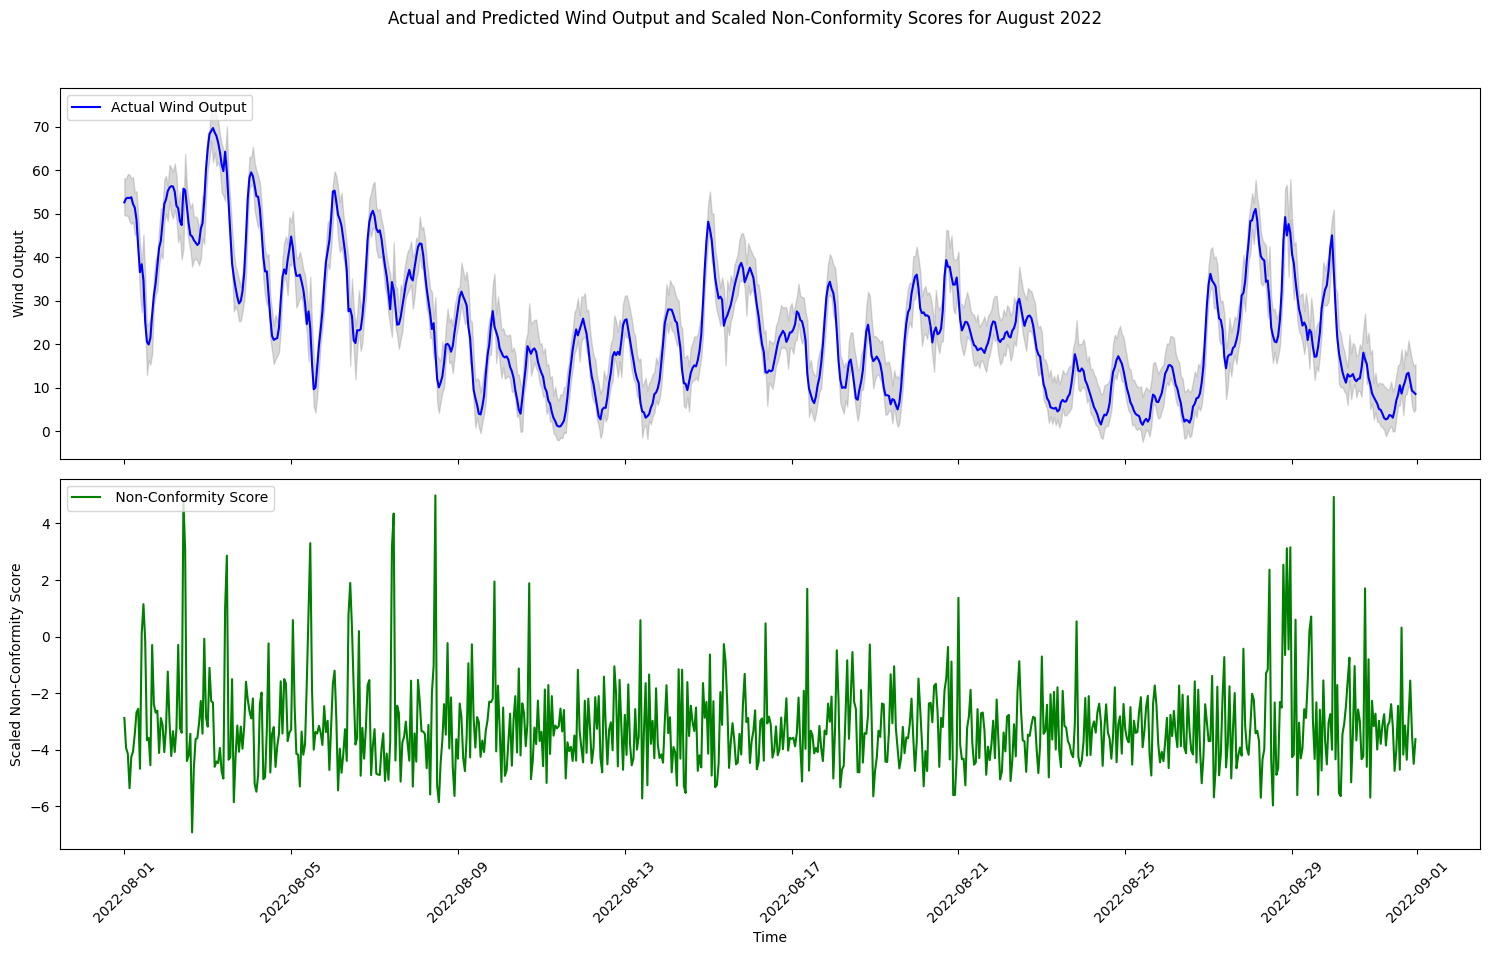

In [ ]:
# Create a grid of subplots
fig, (ax1, ax3) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

# Plot the actual and predicted wind output on the first subplot
ax1.plot(august_2022["Timestamp"], august_2022["WindOutput"], label="Actual Wind Output", color="blue")
# ax1.plot(august_2022["Timestamp"], august_2022["Predicted"], label="Predicted Wind Output", color="red")
ax1.fill_between(august_2022["Timestamp"], lower_bound_august, upper_bound_august, color="gray", alpha=0.3)
ax1.set_ylabel("Wind Output")
ax1.legend(loc='upper left')

# Plot the scaled non-conformity scores on the second subplot
ax3.plot(august_2022["Timestamp"], august_2022["NonConformity"], label=" Non-Conformity Score", color="green")
ax3.set_xlabel("Time")
ax3.set_ylabel("Scaled Non-Conformity Score")
ax3.legend(loc='upper left')

# Set the title and adjust the layout
plt.suptitle("Actual and Predicted Wind Output and Scaled Non-Conformity Scores for August 2022")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
